<a href="https://colab.research.google.com/github/verma-satyam/ML-Coding-Ninjas/blob/main/3.%20MultiVariable%20Regression%20and%20Gradient%20Descent/4_Compound_cycle_plant_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = np.loadtxt("dataset.csv",delimiter=",",skiprows=1)

In [27]:
X = data[:,0:4]
Y = data[:,4]

In [ ]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std
X

array([[-1.51786152, -1.065205  , -0.40735691,  1.14394435],
       [ 0.5352555 ,  0.32927685, -0.31305658,  0.06103098],
       [ 1.35381849,  0.20415122, -1.02872873, -2.15068773],
       ...,
       [-0.49130301, -0.86295791,  0.15844507,  0.36652077],
       [-0.26854652,  0.43787645,  0.89600837,  1.46176333],
       [ 0.54062312, -0.23654282, -0.2355956 , -0.14171561]])

In [ ]:
ones = np.ones((X.shape[0],1))
X = np.hstack((X,ones))
X

array([[-1.51786152, -1.065205  , -0.40735691,  1.14394435,  1.        ],
       [ 0.5352555 ,  0.32927685, -0.31305658,  0.06103098,  1.        ],
       [ 1.35381849,  0.20415122, -1.02872873, -2.15068773,  1.        ],
       ...,
       [-0.49130301, -0.86295791,  0.15844507,  0.36652077,  1.        ],
       [-0.26854652,  0.43787645,  0.89600837,  1.46176333,  1.        ],
       [ 0.54062312, -0.23654282, -0.2355956 , -0.14171561,  1.        ]])

In [28]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.3)

## Linear Regression Using Vectorization - Faster

In [ ]:
# X - Matrix(m*n)
# x - single example, single row with n features
# predict - prediction of whole dataset

def predict(X,m):
  return np.dot(X,m)

def error(X,Y,m):
  M = X.shape[0]
  Y_ = predict(X,m)
  e = ((Y - Y_)**2).sum()
  return e/M

def gradient(X,Y,m):
  M = X.shape[0]
  Y_ = predict(X,m)
  grad = np.dot(X.T,(Y_-Y))
  return grad/M

def gradient_descent(X,Y,lr = 0.1,max_iter = 300):
  M,N = X.shape
  m = np.zeros((N,))
  error_list = []

  for i in range(max_iter):
    e = error(X,Y,m)
    print(i, " Cost: ", e)
    error_list.append(e)

    grad = gradient(X,Y,m)
    m = m - lr*grad

  return m,error_list

In [ ]:
def score(Y_truth, Y_pred):
  u = ((Y_truth - Y_pred)**2).sum()
  v = ((Y_truth - Y_truth.mean())**2).sum()
  return 1 - u/v

In [ ]:
import time
start = time.time()
m,error_list = gradient_descent(X_train,Y_train)
end = time.time()
print(f"Time take is {end-start}")

0  Cost:  206577.15742637002
1  Cost:  167326.7773594454
2  Cost:  135537.9989972258
3  Cost:  109791.27650239713
4  Cost:  88937.56669027751
5  Cost:  72046.59947119011
6  Cost:  58365.11828721004
7  Cost:  47283.13631238754
8  Cost:  38306.650932731434
9  Cost:  31035.56957546129
10  Cost:  25145.84529018655
11  Cost:  20375.015631451275
12  Cost:  16510.49440631519
13  Cost:  13380.09104030288
14  Cost:  10844.333038581835
15  Cost:  8790.248213718318
16  Cost:  7126.328893283823
17  Cost:  5778.453279425965
18  Cost:  4686.581954040162
19  Cost:  3802.082165148142
20  Cost:  3085.560564887915
21  Cost:  2505.1077630579043
22  Cost:  2034.876433376553
23  Cost:  1653.9295869154294
24  Cost:  1345.307674821148
25  Cost:  1095.2729392910333
26  Cost:  892.6973337671892
27  Cost:  728.566733300833
28  Cost:  595.5793396428143
29  Cost:  487.82038409840715
30  Cost:  400.49863180803777
31  Cost:  329.73294552875365
32  Cost:  272.37939800858044
33  Cost:  225.891229134064
34  Cost:  188

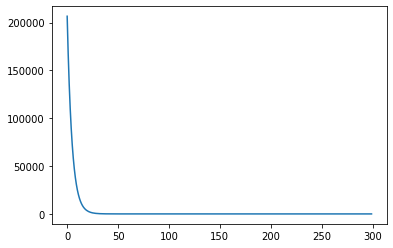

In [ ]:
plt.plot(error_list);

In [ ]:
Y_pred = predict(X_test,m)
score(Y_test,Y_pred)

0.9316324613781587

## Inbuilt Linear Regression

In [29]:
X

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [30]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
score_test = alg1.score(X_test,Y_test)
score_test

0.9289998274091932